# 군집화

## K-평균 알고리즘

K-평균은 군집 중심점 이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행. 

모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인터들을 군집화 하는 기법.

**장점:**

일반적인 군집화에서 가장 많이 활용되는 알고리즘.

알고리즘이 쉽고 간결

**단점:**

거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐.(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음.)

반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐.

몇 개의 군집을 선택해야 할지 가이드하기 어려움.

## 사이킷럿 KMeans 클래스

**n_clusters:** 군집화할 개수, 죽 군집 중심점의 개수를 의미

**init:** 초기에 군집 중심점의 좌표를 설정할 방식을 말하며, 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정.

**max_iter:** 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.

**labels_:** 각 데이터 포인트가 속한 군집 중심점 레이블

**cluster_centers_:** 각 군집 중심점 좌표. 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음.

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [7]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
iris_df['target']=iris.target
iris_df['cluster']=kmeans.labels_
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x']=pca_transformed[:,0]
iris_df['pca_y']=pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca-y,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.326755


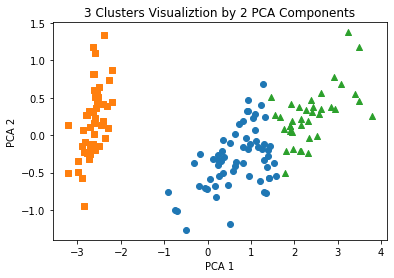

In [16]:
marker0 = iris_df[iris_df['cluster']==0].index
marker1 = iris_df[iris_df['cluster']==1].index
marker2 = iris_df[iris_df['cluster']==2].index

plt.scatter(x=iris_df.loc[marker0,'pca_x'],y=iris_df.loc[maker0,'pca_y'],marker='o')
plt.scatter(x=iris_df.loc[marker1,'pca_x'],y=iris_df.loc[maker1,'pca_y'],marker='s')
plt.scatter(x=iris_df.loc[marker2,'pca_x'],y=iris_df.loc[maker2,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualiztion by 2 PCA Components')
plt.show()

## 군집 평가
대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않음.

또한 군집화는 분류와 유사해 보일 수도 있으나 성격이 많이 다름. 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있음.

비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어려움. 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용.

## 실루엣 분석

실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것임.

실루엣 분석은 실루엣 계수를 기반으로 함. 실루엣 계수는 개별 데이터가 가지는 군집화 지표.

개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표.

특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i),

해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산됨.

두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)이며 이 값을 정규화하기 위해 MAX(a(i), b(i)) 값으로 나눔.

따라서 i번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같이 정의함.

$$
\text{s(i)} = \frac{\text{(b(i) - a(i))}}{\text{max(a(i), b(i))}}
$$

**1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0 ~ 1사이의 값을 가지며, 1에 가까울수록 좋음.**

**2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님.**

In [18]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris_df)

iris_df['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

iris_df['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

iris_df.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [19]:
iris_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

## 평균 이동

평균 이동은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행함.

하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴.

평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수를 이용함.

가장 집중적으로 데이터가 모여있는 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용.

평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취함.

이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아냄.

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [23]:
meanshift = MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [24]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [26]:
import pandas as pd

cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target']=y

best_bandwidth = estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster lables: 유형',np.unique(cluster_labels))

cluster lables: 유형 [0 1 2]


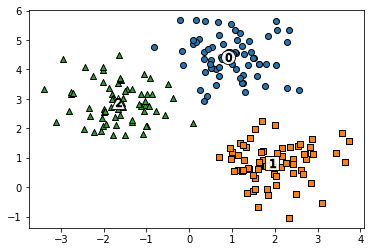

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

cluster_df['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [29]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


## GMM(Gaussian Mixture Model)

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식.

정규 분포로도 알려진 가우시안 분포는 좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 변수.

GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주.

섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출,

In [32]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [34]:
iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data,columns=feature_names)
iris_df['target']=iris.target

In [35]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

iris_df['gmm_cluster']=gmm_cluster_labels
iris_df['target']=iris.target

iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
iris_df['kmeans_cluster'] = kmeans_cluster_labels
iris_result = iris_df.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


붓꽃 데이터 세트는 GMM 군집화에 더 효과적